# Handwriting Reader

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import pygame
from PIL import Image

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.activations import relu,linear, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


'''
from kivy.app import App
from kivy.uix.widget import Widget
from kivy.graphics import Line, Color
from kivy.core.window import Window
from kivy.graphics.texture import Texture

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.activations import relu,linear, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
'''

'\nfrom kivy.app import App\nfrom kivy.uix.widget import Widget\nfrom kivy.graphics import Line, Color\nfrom kivy.core.window import Window\nfrom kivy.graphics.texture import Texture\n\nfrom tensorflow.keras import layers\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, InputLayer\nfrom tensorflow.keras.activations import relu,linear, softmax\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras.losses import SparseCategoricalCrossentropy\n'

In [87]:
#I figured out these locations once and then saved them
#Essentially this data is too much so I am finding the sections
#which correspond to each letter so I can grab certain chunks of the data to train
start_letter_locations = {0: 0, 1: 13869, 2: 22537, 3: 45946, 4: 56080, 5: 67520, 
                          6: 68683, 7: 74445, 8: 81663, 9: 82783, 10: 91276, 11: 96879, 
                          12: 108465, 13: 120801, 14: 139811, 15: 197636, 16: 216977, 
                          17: 222789, 18: 234355, 19: 282774, 20: 305269, 21: 334277, 
                          22: 338459, 23: 349243, 24: 355515, 25: 366374}

#df = pd.read_csv('Data\A_Z Handwritten Data.csv', skiprows=10000, nrows=10000)
path = 'Data\A_Z Handwritten Data.csv'

num_rows = 5

df = pd.read_csv(path, nrows=num_rows)

for i in range(1, 26):
    df_temp = pd.read_csv(path, skiprows=start_letter_locations[i], nrows=num_rows)
    print(df_temp)
    df = pd.concat([df, df_temp], ignore_index=True)
    #df = df.append(df_temp, ignore_index=True)
    #pd.concat(objs, axis=0, join=’outer’, ignore_index=False, keys=None)

   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.618  0.619  0.620  \
0  1    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  1    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  1    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.621  0.622  0.623  0.624  0.625  0.626  0.627  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
   1  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.599  0.600  0.601  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  2  0    0    0    0    0  

KeyboardInterrupt: 

In [64]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.672,0.673,0.674,0.675,0.676,0.677,0.678,0.679,0.680,0.681
0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
y = df['0']
X = df.drop('0', axis=1)

In [66]:
X = X / 255

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
X_train.shape

(1820, 1547)

In [69]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(26, activation='linear'))
model.add(keras.layers.Softmax())

model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary() 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       198,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 26)             │         1,690 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_2 (Softmax)             │ (None, 26)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,090 (812.85 KB)

 Trainable params: 208,090 (812.85 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


c:\Users\SamV\Documents\School\Senior Year\FINAL HANDWRITING\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9566 - loss: 3.2555 - val_accuracy: 0.9654 - val_loss: 3.2476


c:\Users\SamV\Documents\School\Senior Year\FINAL HANDWRITING\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9546 - loss: 3.2450 - val_accuracy: 0.9654 - val_loss: 3.2370
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9601 - loss: 3.2345 - val_accuracy: 0.9654 - val_loss: 3.2265
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9604 - loss: 3.2240 - val_accuracy: 0.9654 - val_loss: 3.2160
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9574 - loss: 3.2136 - val_accuracy: 0.9654 - val_loss: 3.2055
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9559 - loss: 3.2031 - val_accuracy: 0.9654 - val_loss: 3.1950
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9593 - loss: 3.1926 - val_accuracy: 0.9654 - val_loss: 3.1845
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9634 - loss: 3.1820 - val_accuracy: 0.9654 - val_loss: 3.1740
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9611 - loss: 3.1716 - val_accuracy: 0.9654 - val_loss:

In [71]:
_,test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {test_acc}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9695 - loss: 3.1529 
Accuracy: 0.9653846025466919


In [72]:
letters =[chr(i) for i in range(65, 91)]
letters 

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [73]:
y[y == 5].head()

Series([], Name: 0, dtype: int64)

In [74]:
f_rand_idx = 1000
plt.imshow(X.iloc[f_rand_idx].values.reshape(28, 28), cmap='crest')
plt.show()

pred_v = model.predict(np.array([X.iloc[f_rand_idx].values]))
print('Resposta: ', letters[np.argmax(pred_v)])

ValueError: cannot reshape array of size 1547 into shape (28,28)

In [75]:
def downsample(df, block_size):
    '''
    lists = [[] for _ in range(28)]
    #df_lists = pd.DataFrame(np.nan, index=range(28), columns=range(28))

    for i in range(block_size):
        for j in range(block_size):
            all_vals = []
            for m in range(28):
                for n in range(28):
                    row = (i*28) + m
                    col = (j*28) + n
                    val = df.iloc[row, col]
                    all_vals.append(val)
            lists[i].append(all_vals)

    bool_list = pd.DataFrame(np.nan, index=range(28), columns=range(28))
    count_list = pd.DataFrame(np.nan, index=range(28), columns=range(28))

    for r in range(len(lists)):
        for c in range(len(lists[r])):
            count = sum(lists[r][c])
            if count > 0:
                bool_list.iloc[r, c] = True
            else:
                bool_list.iloc[r, c] = False
            count_list.iloc[r, c] = count

    return (bool_list, count_list)


    '''


    # Convert DataFrame to numpy array for faster processing
    arr = df.to_numpy()
    # Get the new dimensions
    new_height = arr.shape[0] // block_size
    new_width = arr.shape[1] // block_size
    # Prepare a new array of the same type
    new_arr = np.zeros((new_height, new_width), dtype=bool)

    # Iterate over new array indices
    for i in range(new_height):
        for j in range(new_width):
            # Determine the block in the original array
            vertical_slice = slice(i * block_size, (i + 1) * block_size)
            horizontal_slice = slice(j * block_size, (j + 1) * block_size)
            block = arr[vertical_slice, horizontal_slice]
            # Set the value in the new array based on the presence of any True in the block
            new_arr[i, j] = np.any(block)

    return pd.DataFrame(new_arr)

In [76]:
def df_to_image(df):
    array = df.to_numpy()
    image_data = np.where(array, 0, 255).astype(np.uint8)
    img = Image.fromarray(image_data, 'L')  # 'L' mode for grayscale
    return img

C:\Users\SamV\AppData\Local\Temp\ipykernel_13060\3010855385.py:71: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  single_row_color = single_row_bool.applymap(lambda x: 255 if x else 0)


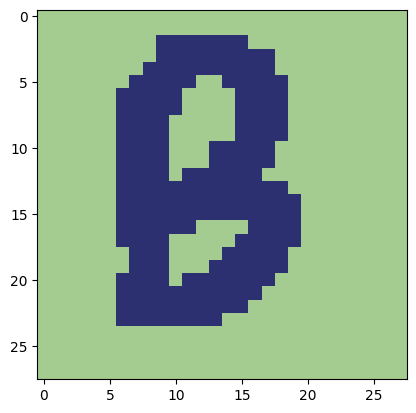

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 1547, but received input with shape (1, 784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 784), dtype=float32)
  • training=False
  • mask=None

In [77]:
pygame.init()

# Constants
width, height = 28**2, 28**2  # Size of the window in pixels
background_color = (0, 0, 0)  # Black
draw_color = (255, 255, 255)  # White
line_thickness = 2

# Setup the display
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Draw Here!")
screen.fill(background_color)
clock = pygame.time.Clock()

drawing = False
running = True

# Event loop
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            drawing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            drawing = False
        elif event.type == pygame.MOUSEMOTION and drawing:
            pygame.draw.circle(screen, draw_color, event.pos, line_thickness)

    pygame.display.flip()
    clock.tick(60)

# Convert the drawing on the screen to a numpy array
buffer_string = pygame.image.tostring(screen, 'RGB')
image = pygame.image.fromstring(buffer_string, (width, height), 'RGB')
array = pygame.surfarray.array3d(image)

# Check which pixels are colored (deviate from background_color)
is_colored = np.any(array != np.array(background_color).reshape(1, 1, 3), axis=2)

# Create DataFrame from the boolean array
df = pd.DataFrame(is_colored)
#df_condensed, df_count = downsample(df, 28)
df_condensed = downsample(df, 28)

df_condensed = df_condensed.T
df_final = df_condensed.copy()

for r in range(len(df_condensed)):
    for c, col_name in enumerate(df_condensed.columns):
        surrounding_list = []
        for r_add in range(-1, 2):
            for c_add in range(-1, 2):
                if r+r_add != -1:
                    try:
                        surrounding_list.append(df_condensed.iat[r+r_add, c+c_add])
                    except IndexError:
                        pass
        if True in surrounding_list:
            df_final.at[r, c] = True

'''
img = df_to_image(df_final)
# Save or display the image
img.show()
'''

pygame.quit()

single_row_bool = pd.DataFrame(df_final.values.flatten()).T
single_row_color = single_row_bool.applymap(lambda x: 255 if x else 0)
single_row_color = single_row_color / 255

plt.imshow(single_row_color.iloc[0].values.reshape(28, 28), cmap='crest')
plt.show()

pred_v = model.predict(np.array([single_row_color.iloc[0].values]))
print('Model Prediction: ', letters[np.argmax(pred_v)])


C:\Users\SamV\AppData\Local\Temp\ipykernel_13060\2019252454.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  single_row_color = single_row_bool.applymap(lambda x: 255 if x else 0)


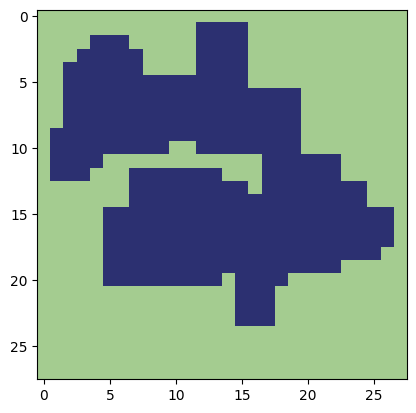

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model Prediction:  B


In [48]:
single_row_bool = pd.DataFrame(df_final.values.flatten()).T
single_row_color = single_row_bool.applymap(lambda x: 255 if x else 0)
single_row_color = single_row_color / 255

plt.imshow(single_row_color.iloc[0].values.reshape(28, 28), cmap='crest')
plt.show()

pred_v = model.predict(np.array([single_row_color.iloc[0].values]))
print('Model Prediction: ', letters[np.argmax(pred_v)])

In [3]:
class DrawInput(Widget):
    def on_touch_down(self, touch):
        if self.collide_point(*touch.pos):
            with self.canvas:
                Color(1, 1, 1, 1)  # Draw in white
                touch.ud['line'] = Line(points=(touch.x, touch.y), width=10)

    def on_touch_move(self, touch):
        if self.collide_point(*touch.pos):
            touch.ud['line'].points += [touch.x, touch.y]

class DrawingApp(App):
    def build(self):
        self.title = 'Letter Writing'
        Window.size = (28, 28)
        self.painter = DrawInput(size=(28, 28))
        Window.bind(on_request_close=self.on_request_close)
        return self.painter

    def on_request_close(self, *args, **kwargs):
        self.save_drawing_as_dataframe()
        Window.close()
        return True

    def save_drawing_as_dataframe(self):
        # Export the canvas content to an RGBA byte string
        data = self.painter.export_as_image().texture.pixels
        img = Image.frombytes('RGBA', (784, 784), bytes(data), 'raw')

        # Convert RGBA to Grayscale
        gray = img.convert('L')
        img_array = np.array(gray)

        # Normalize the image array and convert to DataFrame
        img_df = pd.DataFrame(img_array / 255.0)  # Normalize pixel values
        img_df.to_csv('handwritten_data.csv', index=False)
        print("Drawing saved as 'handwritten_data.csv'.")

if __name__ == '__main__':
    DrawingApp().run()

NameError: name 'Image' is not defined

: 

In [16]:
class DrawInput(Widget):
    def on_touch_down(self, touch):
        with self.canvas:
            touch.ud['line'] = Line(points=(touch.x, touch.y))

    def on_touch_move(self, touch):
        touch.ud['line'].points += [touch.x, touch.y]

class DrawingApp(App):
    def build(self):
        return DrawInput()

if __name__ == '__main__':
    DrawingApp().run()

: 

In [ ]:
class DrawInput(Widget):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.bind(size=self.update_canvas)
        self.bind(pos=self.update_canvas)

    def on_touch_down(self, touch):
        with self.canvas:
            Color(1, 1, 1)  # White color for the drawing
            touch.ud['line'] = Line(points=(touch.x, touch.y), width=2)

    def on_touch_move(self, touch):
        touch.ud['line'].points += [touch.x, touch.y]

    def update_canvas(self, *args):
        self.canvas.clear()
        with self.canvas:
            Color(0, 0, 0)  # Black color for the background
            self.rect = Rectangle(pos=self.pos, size=self.size)
            Color(1, 1, 1)  # White color for the drawing

class DrawingApp(App):
    def build(self):
        self.title = 'Handwriting Capture'
        Window.clearcolor = (0, 0, 0, 1)  # Set background color to black
        self.painter = DrawInput()
        Window.bind(on_request_close=self.on_request_close)
        return self.painter

    def on_request_close(self, *args, **kwargs):
        self.save_drawing()
        return False  # Returning False keeps the window open, use True if you want to close it

    def save_drawing(self):
        self.painter.size = (256, 256)  # Resize if necessary
        self.painter.pos = (0, 0)